<a href="https://colab.research.google.com/github/kwnstantinosRoumeliwtis/ML_course/blob/main/ML3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [499]:
import yfinance as yf
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error


In [500]:
ticker_symbol = "DX-Y.NYB"
ticker = yf.Ticker(ticker_symbol)
df = ticker.history(period="5y").reset_index(drop=False)
df=df.drop(["Volume","Dividends","Stock Splits"],axis=1)
df

,Date,Open,High,Low,Close
0,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003
1,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003
2,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000
3,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001
4,2020-11-12 00:00:00-05:00,93.010002,93.139999,92.779999,92.959999
...,...,...,...,...,...
1253,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003
1254,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003
1255,2025-11-04 00:00:00-05:00,99.980003,100.260002,99.739998,100.220001
1256,2025-11-05 00:00:00-05:00,100.180000,100.360001,100.059998,100.199997


1)

In [501]:
fig = px.line(df, x="Date", y=df.columns[1:])
fig.show()

2)

Οι χρονοσειρές δεν είναι στατικές καθώς οι τιμές τους επηρεάζονται και μεταβάλλονται από σημαντικά γεγονότα που συμβαίνουν μέσα στον χρόνο. Π.χ jul 2022- jan 2023

3)

Αν η παλινδρόμηση ήταν γραμμική σίγουρα θα υπήρχε πρόβλημα γιατί δεν θα μπορούσε να προβλέψει με καμπύλη και το σφάλμα στο y θα ήταν μεγάλο. Αν ήταν λογιστική θα είχε καλύτερα αποτελέσματα, ωστόσο θα ήταν δύσκολο να προβλέψει τις μεγάλες αλλαγές, καθώς υπάρχουν σπάνια γεγονότα που αλλάζουν τις χρονοσειρές και συμβαίνουν σε τυχαία χρονικά διαστήματα. Άρα το μοντέλο μας δεν θα μπορεί να προβλέπει από τα δεδομένα που θα εκπαιδευτεί πότε θα γίνει το επόμενο τυχαίο γεγονός.

4) Η τάση είναι ξεκάθαρα πτωτική εκείνο το διάστημα. Αυτό συνέβει ύστερα από τους δασμούς που επέβαλλαν οι Η.Π.Α εναντίον μίας σειράς εμπορικών εταίρων. Αυτό δημιούργησε αβεβαιότητα παγκοσμίως.

5) Όχι σε καμία περίπτωση δεν είναι σωστό να προβλέψουμε την τιμή του δολαρίου την επόμενη μέρα αν έχουμε μόνο τα δεδομένα της σημερινής. Οι χρονοσειρές επηρεάζονται από μία σειρά τιμών που παίρνουν οι μεταβλητές σε ένα αξιόλογο χρονικό διάστημα. Επομένως είναι πιο αξιόπιστο η πρόβλεψη μας να γίνει με βάση τα δεδομένα της προηγούμενης εβδομάδας συνολικά.

6) Όχι δεν έχει νόημα να γίνει τυχαίος διαχωρισμός των δεδομένων, καθώς το μοντέλο μας θέλουμε να μάθει να προβλέπει με βάση τι προηγήθηκε στον χρόνο. Άν δεν του δώσουμε αυτή τη δυνατότητα οι προβλέψεις μας δεν θα έχουν κανένα νόηγμα καθώς θα είναι εντελώς τυχαίες.

7)

In [502]:
train_data = df[df.Date.dt.year<2024]
test_data = df[(df.Date.dt.year>=2024) & (df.Date.dt.year<2025)]
train_data = train_data.drop("Date",axis=1)
test_data = test_data.drop("Date",axis=1)
train_data




,Open,High,Low,Close
0,92.570000,92.820000,92.180000,92.230003
1,92.239998,92.959999,92.129997,92.730003
2,92.760002,92.970001,92.599998,92.750000
3,92.699997,93.209999,92.610001,93.040001
4,93.010002,93.139999,92.779999,92.959999
...,...,...,...,...
786,101.760002,101.900002,101.430000,101.699997
787,101.650002,101.769997,101.449997,101.470001
788,101.550003,101.570000,100.830002,100.989998
789,100.870003,101.300003,100.620003,101.230003


8)

In [503]:
def slice_dataframe(dataframe, N):
  list_x = []
  list_y = []
  for i in range(len(dataframe)-N):
    list_x.append(dataframe.iloc[i:i+N].to_numpy().flatten())
    list_y.append(dataframe.iloc[i+N][-1])
  return list_x, list_y



9)

Αν θέλουμε να προβλέψουμε την επόμενη ημέρα το μέγεθος του timeframe πρέπει είναι από 5-7 ημέρες για να μαθαίνει από άμεσο παρελθόν. 1 ημέρα δεν αρκεί να συσχετίσει τόσο καλά τις μεταβολές των δεδομένων. Αν θέλουμε να προβλέψουμε μακρυνότερο ορίζοντα όπως μήνα, το μέγεθος του timeframe πρέπει να είναι στο μέγεθος 2-3 μηνών ώστε το μοντέλο μας να μαθαίνει τις μεταβολές σε μεγαλύτερο διάστημα .

10) *To flatten το κάνω μέσα στη συνάρτηση


In [504]:
train_x, train_y = slice_dataframe(train_data,5)
test_x, test_y = slice_dataframe(test_data,5)
print(train_x[0])


[92.56999969 92.81999969 92.18000031 92.23000336 92.23999786 92.95999908
 92.12999725 92.73000336 92.76000214 92.97000122 92.59999847 92.75
 92.69999695 93.20999908 92.61000061 93.04000092 93.01000214 93.13999939
 92.77999878 92.95999908]


/tmp/ipython-input-1719916913.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



11)

In [505]:
estimators = [('lr', LinearRegression()), ('dt', DecisionTreeRegressor())]
models = [LinearRegression(),RandomForestRegressor(),BaggingRegressor(estimator = LinearRegression()), StackingRegressor(estimators=estimators)]
train_mae = []
test_mae = []
for model in models:
  model.fit(train_x,train_y)
  y_pred_train = model.predict(train_x)
  mae = mean_absolute_error(train_y, y_pred_train)
  train_mae.append(mae)
  y_pred_test = model.predict(test_x)
  mae = mean_absolute_error(test_y, y_pred_test)
  test_mae.append(mae)





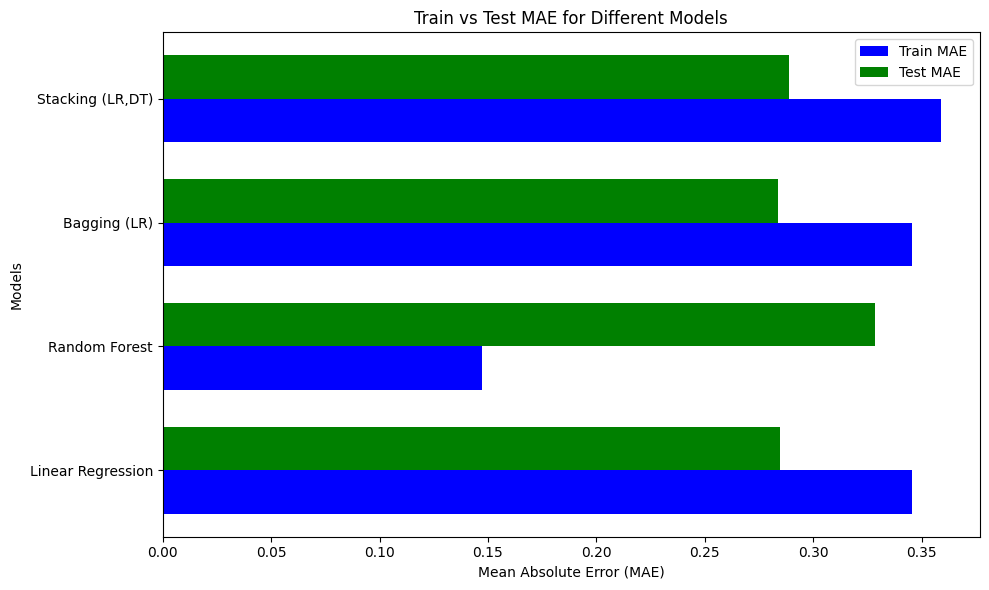

In [506]:
y_pos = np.arange(len(models))
bar_width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
bars_train = ax.barh(y_pos - bar_width/2, train_mae, bar_width, color='blue', label='Train MAE')
bars_test = ax.barh(y_pos + bar_width/2, test_mae, bar_width, color='green', label='Test MAE')
ax.set_xlabel('Mean Absolute Error (MAE)')
ax.set_ylabel('Models')
ax.set_title('Train vs Test MAE for Different Models')
ax.set_yticks(y_pos)
ax.set_yticklabels(['Linear Regression', 'Random Forest', 'Bagging (LR)', 'Stacking (LR,DT)'])
ax.legend()
plt.tight_layout()
plt.show()

12)

In [507]:
train_data["Day"] = df[df.Date.dt.year<2024].Date.dt.day
train_data["Month"] = df[df.Date.dt.year<2024].Date.dt.month
test_data["Day"] = df[(df.Date.dt.year>=2024) & (df.Date.dt.year<2025)].Date.dt.day
test_data["Month"] =  df[(df.Date.dt.year>=2024) & (df.Date.dt.year<2025)].Date.dt.month
td=train_data
tsd=test_data


Eνδεχομένως να συσχετιστούν ακόμη περισσότερο χρονικά τα δεδομένα μας με τα timeframes.

In [508]:
train_data.iloc[:,:4] = abs(np.log( td.iloc[:,:-2].shift(-1) / td.iloc[:,:-2]))
test_data.iloc[:,:4] = abs(np.log( tsd.iloc[:,:-2].shift(-1) / tsd.iloc[:,:-2]))
train_data



,Open,High,Low,Close,Day,Month
0,0.003571,0.001507,0.000543,0.005407,6,11
1,0.005622,0.000108,0.005089,0.000216,9,11
2,0.000647,0.002578,0.000108,0.003122,10,11
3,0.003339,0.000751,0.001834,0.000860,11,11
4,0.000645,0.001397,0.000755,0.002154,12,11
...,...,...,...,...,...,...
786,0.001082,0.001277,0.000197,0.002264,22,12
787,0.000984,0.001967,0.006130,0.004742,26,12
788,0.006719,0.002662,0.002085,0.002374,27,12
789,0.003266,0.001184,0.004462,0.000987,28,12


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>]], dtype=object)

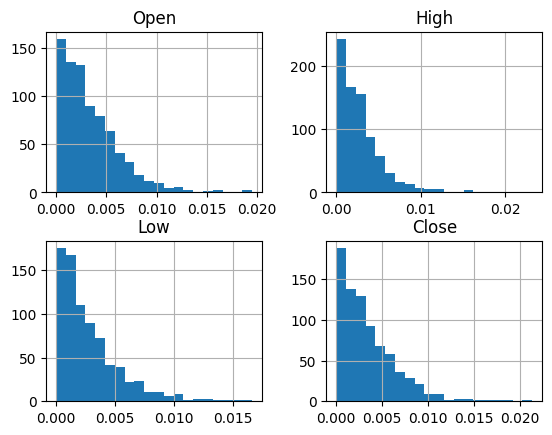

In [509]:
train_data.iloc[:,:-2].hist(bins=20)


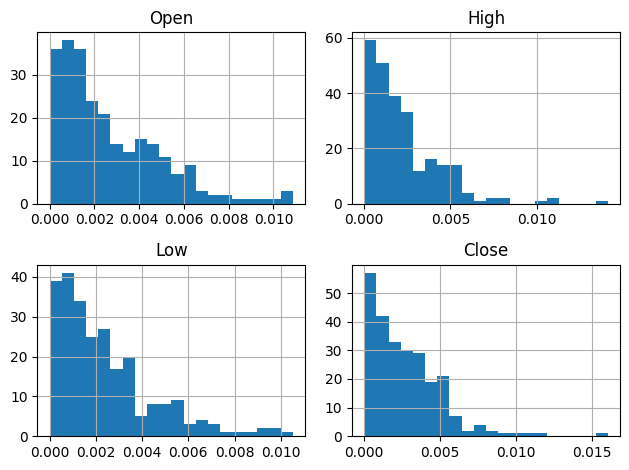

In [510]:
test_data.iloc[:,:-2].hist(bins=20)
plt.tight_layout()
plt.show()


Οι τιμές είναι κανονικοποιημένες μέσω μίας λογαριθμικής συσχέτισης μεταξύ προηγούμενης και επόμενης ημέρας, άρα τα δεδομένα μας είναι καλύτερα.

Αν προβλέψουμε με διαφορά 1 cent τότε η πρόβλεψη μας θα είναι καλή γιατί η διαφορά είναι μικρή. Η τιμή από 0.95 θα γίνει 0.96

In [511]:
def slice_dataframe1(dataframe, N):
  list_x = []
  list_y = []
  for i in range(len(dataframe)-N):
    list_x.append(dataframe.iloc[i:i+N].to_numpy().flatten())
    list_y.append(dataframe.iloc[i+N][-3])
  return list_x[:-1], list_y[:-1]

train_x, train_y = slice_dataframe1(train_data,5)
test_x, test_y = slice_dataframe1(test_data,5)
y_train_p=[]
y_test_p=[]

estimators = [('lr', LinearRegression()), ('dt', DecisionTreeRegressor())]
models = [LinearRegression(),RandomForestRegressor(),BaggingRegressor(estimator = LinearRegression()), StackingRegressor(estimators=estimators)]
train_mae = []
test_mae = []
for model in models:
  model.fit(train_x,train_y)
  y_pred_train = model.predict(train_x)
  mae = mean_absolute_error(train_y, y_pred_train)
  train_mae.append(mae)
  y_pred_test = model.predict(test_x)
  mae = mean_absolute_error(test_y, y_pred_test)
  test_mae.append(mae)
  if model == models[1]:
    y_train_p = y_pred_train
    y_test_p = y_pred_test










/tmp/ipython-input-3980201269.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



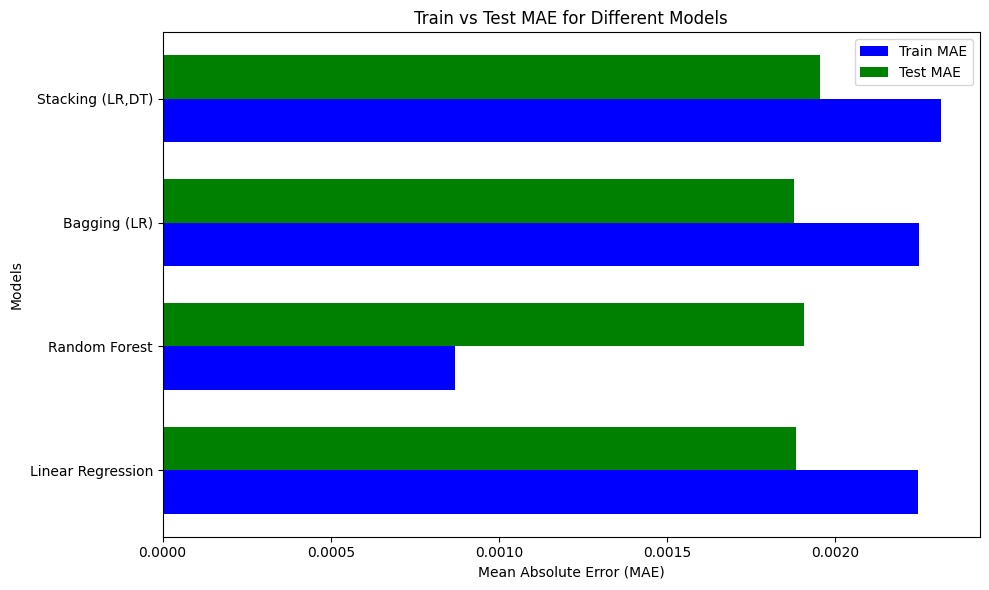

In [512]:
y_pos = np.arange(len(models))
bar_width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
bars_train = ax.barh(y_pos - bar_width/2, train_mae, bar_width, color='blue', label='Train MAE')
bars_test = ax.barh(y_pos + bar_width/2, test_mae, bar_width, color='green', label='Test MAE')
ax.set_xlabel('Mean Absolute Error (MAE)')
ax.set_ylabel('Models')
ax.set_title('Train vs Test MAE for Different Models')
ax.set_yticks(y_pos)
ax.set_yticklabels(['Linear Regression', 'Random Forest', 'Bagging (LR)', 'Stacking (LR,DT)'])
ax.legend()
plt.tight_layout()
plt.show()

13)

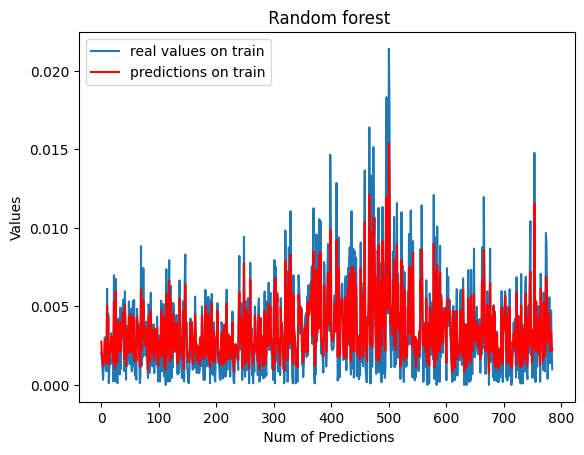

In [513]:
plt.plot(np.arange(len(y_train_p)), train_y, label = "real values on train")
plt.plot(np.arange(len(y_train_p)), y_train_p, color = 'r', label = "predictions on train")
plt.title(" Random forest")
plt.xlabel(" Num of Predictions")
plt.ylabel("Values")
plt.legend()
plt.show()


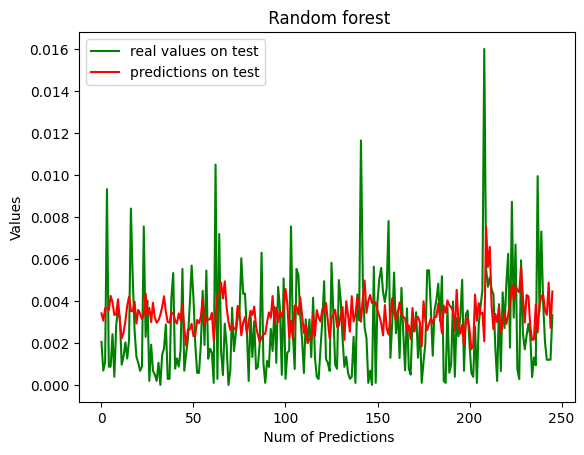

In [514]:
plt.plot(np.arange(len(y_test_p)), test_y, color = 'green', label = "real values on test")
plt.plot(np.arange(len(y_test_p)), y_test_p, color = 'r', label = "predictions on test")
plt.title(" Random forest")
plt.xlabel(" Num of Predictions")
plt.ylabel("Values")
plt.legend()
plt.show()